In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [3]:
#loading dataset
ftlzr = pd.read_csv("/content/Fertilizer Prediction.csv")
ftlzr.head(19)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
5,26,52,35,Sandy,Barley,12,10,13,17-17-17
6,25,50,64,Red,Cotton,9,0,10,20-20
7,33,64,50,Loamy,Wheat,41,0,0,Urea
8,30,60,42,Sandy,Millets,21,0,18,28-28
9,29,58,33,Black,Oil seeds,9,7,30,14-35-14


In [4]:
#checking shape of dataset
ftlzr.shape

(99, 9)

In [5]:
#checking the basic info
ftlzr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [6]:
#basic stats
ftlzr.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [7]:
#only numerical values for correlatin mtrx
ftlzr_number = ftlzr.select_dtypes(include=['int64', 'float64'])
ftlzr_number.corr()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


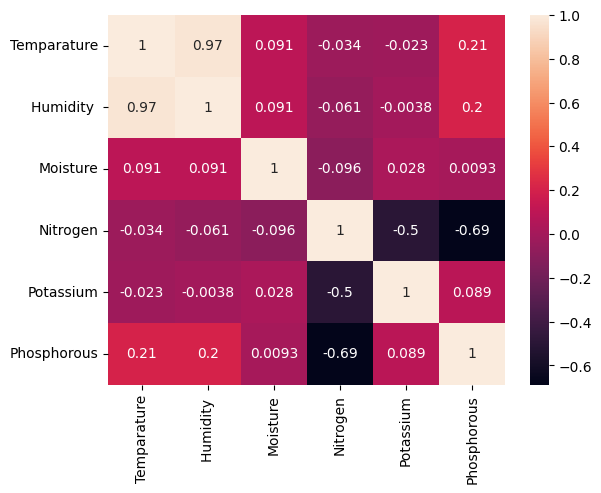

In [8]:
#heatmap
sns.heatmap(ftlzr_number.corr(), annot=True)
plt.show()

In [9]:
#count of fertilizer
ftlzr['Fertilizer Name'].value_counts()

,count
Fertilizer Name,
Urea,22
DAP,18
28-28,17
14-35-14,14
20-20,14
17-17-17,7
10-26-26,7


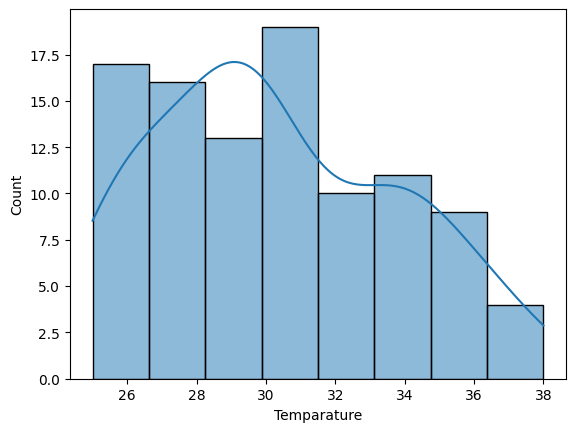

In [10]:
#distribution of tempratutre collumn
sns.histplot(ftlzr['Temparature'],kde=True) # Changed 'Temperature' to 'Temparature'
plt.show()

In [13]:
#only select the numerical collums
features = ftlzr.select_dtypes(include=[np.number]).columns.tolist()
print(features)

['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']


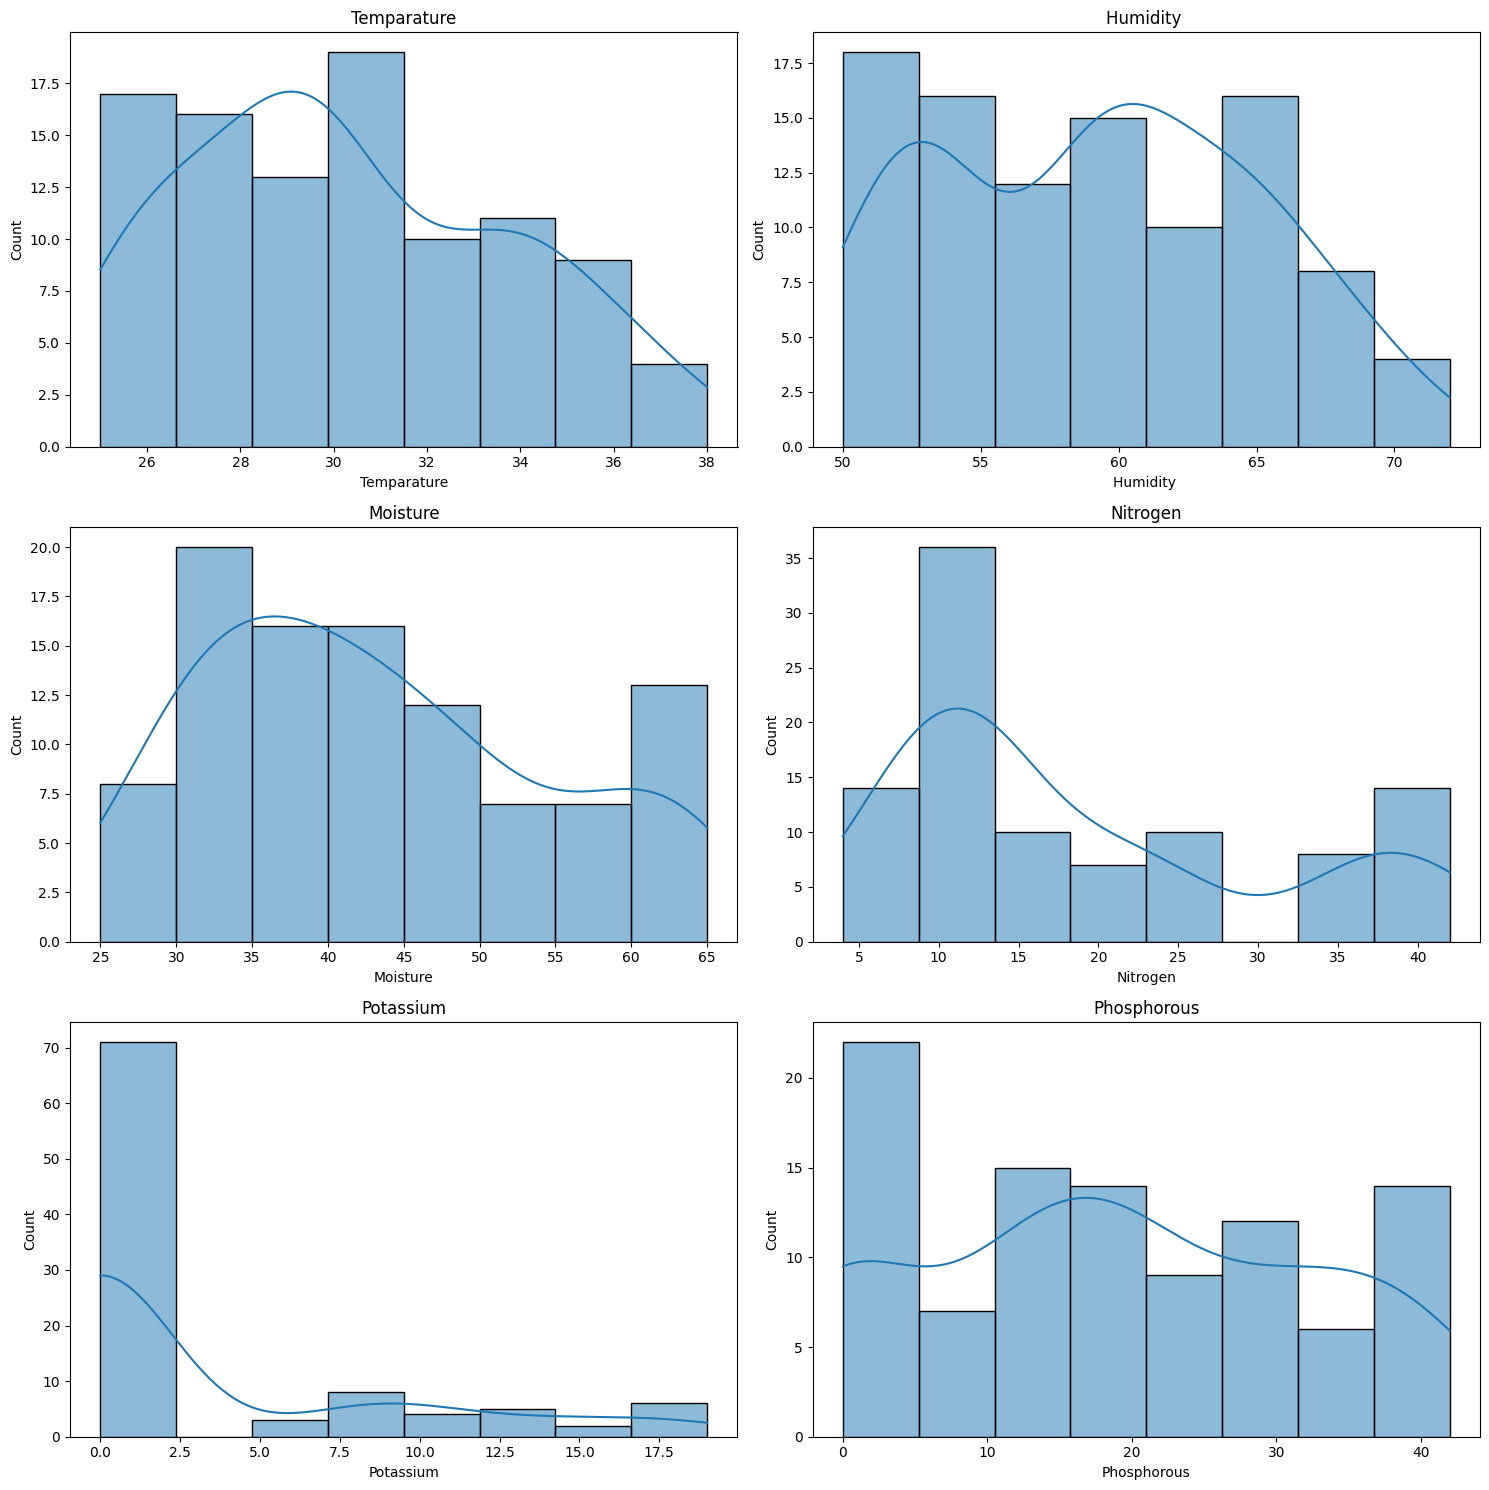

In [17]:
#visualize the distribution of each feature
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 15))
for i, subplot in zip(features,axs.flatten()):
    sns.histplot(ftlzr[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

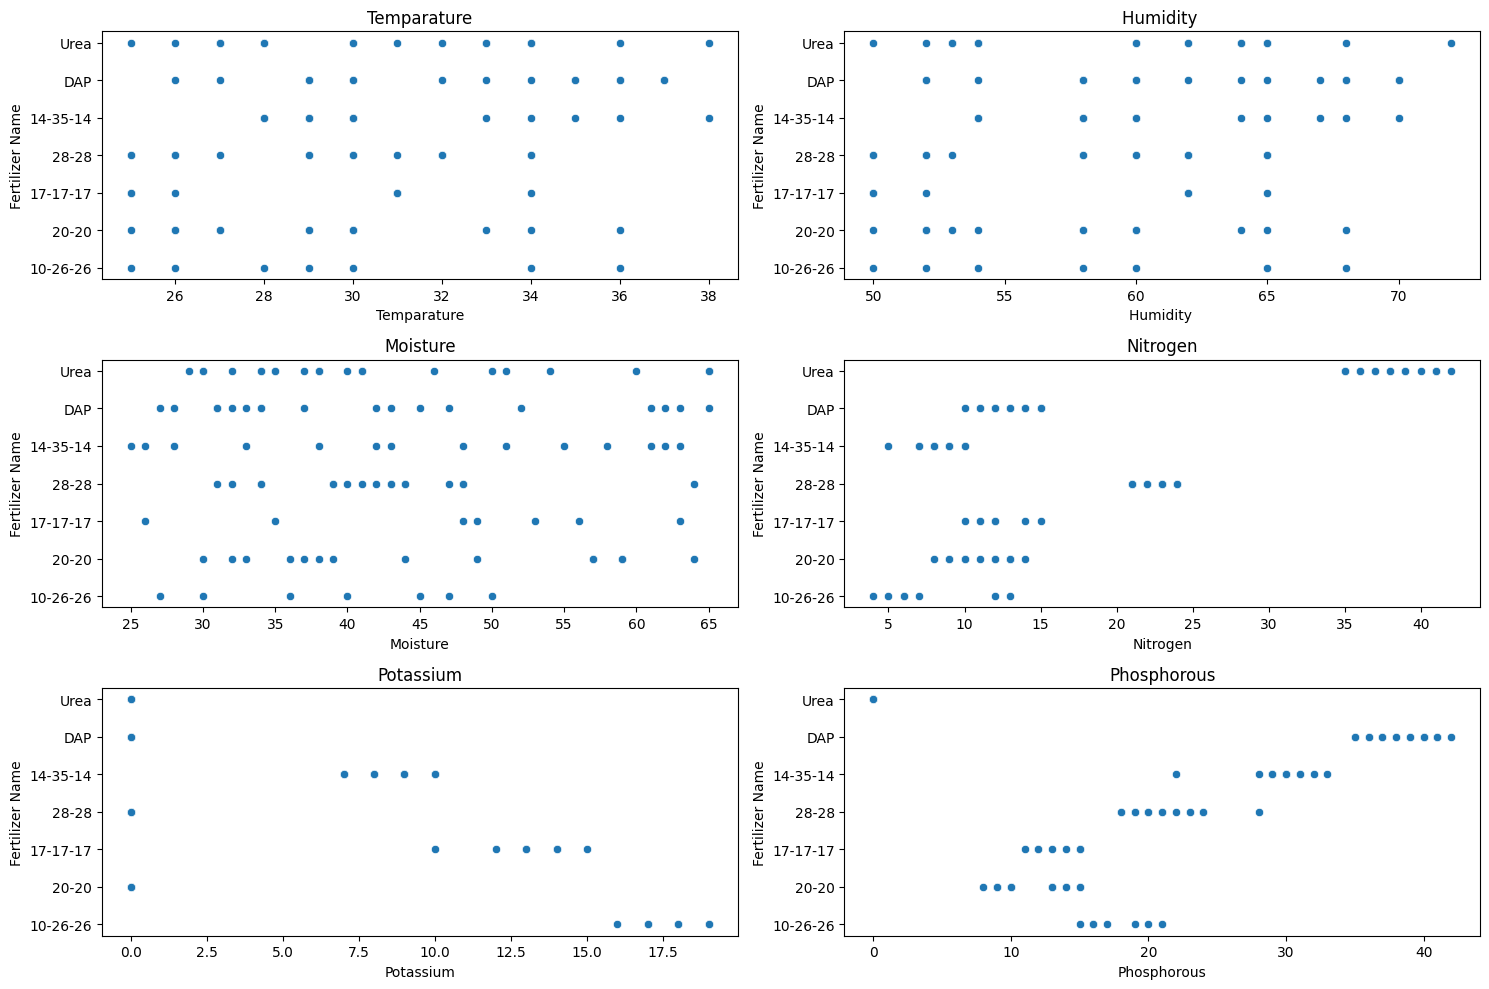

In [19]:
#scatter point plots
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
for i, subplot in zip(features,axs.flatten()):
    sns.scatterplot(x=ftlzr[i], y=ftlzr['Fertilizer Name'], ax=subplot)
    subplot.set_title(i)
plt.tight_layout()
plt.show

Encoding the target collumns


In [20]:
fert_dict = {'Urea': 1, 'DAP': 2, '14-35-14': 3, '28-28': 4, '17-17-17': 5, '20-20': 6}
ftlzr['Fertilizer_Number'] = ftlzr['Fertilizer Name'].map(fert_dict)
ftlzr['Fertilizer_Number'].value_counts()
ftlzr.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Fertilizer_Number
0,26,52,38,Sandy,Maize,37,0,0,Urea,1.0
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,2.0
2,34,65,62,Black,Cotton,7,9,30,14-35-14,3.0
3,32,62,34,Red,Tobacco,22,0,20,28-28,4.0
4,28,54,46,Clayey,Paddy,35,0,0,Urea,1.0


In [21]:
#drop the target column with name and keep the target column with number
ftlzr.drop('Fertilizer Name', axis=1, inplace=True)
ftlzr.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Number
0,26,52,38,Sandy,Maize,37,0,0,1.0
1,29,52,45,Loamy,Sugarcane,12,0,36,2.0
2,34,65,62,Black,Cotton,7,9,30,3.0
3,32,62,34,Red,Tobacco,22,0,20,4.0
4,28,54,46,Clayey,Paddy,35,0,0,1.0


In [22]:
#select the object column
ftlzr_object = ftlzr.select_dtypes(include='object').columns.tolist()
ftlzr_object

['Soil Type', 'Crop Type']

In [23]:
#covert the categorical column to numerical column using label encoder
lb = LabelEncoder()
ftlzr['Soil Type'] = lb.fit_transform(ftlzr['Soil Type'])
ftlzr['Crop Type'] = lb.fit_transform(ftlzr['Crop Type'])
ftlzr.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Number
0,26,52,38,4,3,37,0,0,1.0
1,29,52,45,2,8,12,0,36,2.0
2,34,65,62,0,1,7,9,30,3.0
3,32,62,34,3,9,22,0,20,4.0
4,28,54,46,1,6,35,0,0,1.0


In [33]:
#split the dataset into features and target
ftlzr.dropna(subset=['Fertilizer_Number'], inplace=True)
x= ftlzr.drop('Fertilizer_Number', axis=1)
y= ftlzr['Fertilizer_Number']
#print the shape of features and target
print(x.shape)
print(y.shape)

(92, 8)
(92,)


In [34]:
#splitting the dataset into training and testing collumn sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=45)
#print the shape of traininf and testing set
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(73, 8)
(19, 8)
(73,)
(19,)



Scaling

In [35]:
#scale the features using StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training Models


In [36]:
#initialise  the decision tree classifer
model = DecisionTreeClassifier()


In [37]:
#train the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
accuracy = model.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [40]:
#evaluate the model on the trainig set  and print the accuracy
accuracy = model.score(x_train, y_train)
print("Accuracy:", accuracy)

Accuracy: 1.0


Predictive System

In [44]:
def fertilizer_recommend(Temparature, Humidity, Moisture, soil_type, crop_type, Nitrogen, Potassium, Phosphorous):
    features = np.array([[Temparature, Humidity, Moisture, soil_type, crop_type, Nitrogen, Potassium, Phosphorous]])
    transformed_features = sc.transform(features)
    prediction = model.predict(transformed_features)
    fert_dict = {1: 'Urea', 2: 'DAP', 3: '14-35-14', 4: '28-28', 5: '17-17-17', 6: '20-20', 7: '10-26-26'}
    return f"{fert_dict[prediction[0]]} is best fertilizer according to the given conditions"


In [50]:
import random
import numpy as np

# Randomly generated inputs
Temparature = round(random.uniform(15, 40), 2)    # float between 15°C and 40°C
Humidity = round(random.uniform(0.3, 0.9), 2)     # float between 30% and 90%
Moisture = round(random.uniform(0.2, 0.8), 2)     # float between 20% and 80%
soil_type = random.randint(0, 6)                  # integer, assuming 7 soil types (0–6)
crop_type = random.randint(0, 21)                 # integer, assuming 22 crop types (0–21)
Nitrogen = random.randint(0, 100)                 # integer, 0–100 mg/kg
Potassium = random.randint(0, 100)
Phosphorous = random.randint(0, 100)

# Print the randomly generated inputs
print(f"Temperature: {Temparature}")
print(f"Humidity: {Humidity}")
print(f"Moisture: {Moisture}")
print(f"Soil Type: {soil_type}")
print(f"Crop Type: {crop_type}")
print(f"Nitrogen: {Nitrogen}")
print(f"Potassium: {Potassium}")
print(f"Phosphorous: {Phosphorous}")

# Call the recommendation function
result = fertilizer_recommend(Temparature, Humidity, Moisture, soil_type, crop_type, Nitrogen, Potassium, Phosphorous)
print(result)


Temperature: 29.16
Humidity: 0.3
Moisture: 0.74
Soil Type: 6
Crop Type: 19
Nitrogen: 88
Potassium: 0
Phosphorous: 12
Urea is best fertilizer according to the given conditions


In [52]:
#saving the trained para meters
import pickle
#save the model
pickle.dump(model,open('fertilizer_model.sav','wb'))
#saving the standard scaler
pickle.dump(sc,open('scaler.sav','wb'))

In [53]:
#loading the model
modell = pickle.load(open('/content/fertilizer_model.sav','rb'))
#load the scaler
sc = pickle.load(open('/content/scaler.sav','rb'))

using new model trained save fore prediction



In [54]:
#loading the modekl
DT = pickle.load(open('/content/fertilizer_model.sav','rb'))
#loading the scaler
sc = pickle.load(open('/content/scaler.sav','rb'))

In [55]:
#prediction the fertlizer
import random
import numpy as np

# Randomly generated inputs
Temparature = round(random.uniform(15, 40), 2)    # float between 15°C and 40°C
Humidity = round(random.uniform(0.3, 0.9), 2)     # float between 30% and 90%
Moisture = round(random.uniform(0.2, 0.8), 2)     # float between 20% and 80%
soil_type = random.randint(0, 6)                  # integer, assuming 7 soil types (0–6)
crop_type = random.randint(0, 21)                 # integer, assuming 22 crop types (0–21)
Nitrogen = random.randint(0, 100)                 # integer, 0–100 mg/kg
Potassium = random.randint(0, 100)
Phosphorous = random.randint(0, 100)

# Print the randomly generated inputs
print(f"Temperature: {Temparature}")
print(f"Humidity: {Humidity}")
print(f"Moisture: {Moisture}")
print(f"Soil Type: {soil_type}")
print(f"Crop Type: {crop_type}")
print(f"Nitrogen: {Nitrogen}")
print(f"Potassium: {Potassium}")
print(f"Phosphorous: {Phosphorous}")

# Call the recommendation function
result = fertilizer_recommend(Temparature, Humidity, Moisture, soil_type, crop_type, Nitrogen, Potassium, Phosphorous)
print(result)


Temperature: 25.19
Humidity: 0.33
Moisture: 0.62
Soil Type: 4
Crop Type: 12
Nitrogen: 50
Potassium: 83
Phosphorous: 35
DAP is best fertilizer according to the given conditions
